# Linear Regressions in scikit-learn

## Import a lot of things

Here is the starndard way of importing these things.

In [1]:
# base python's random number library
import random

# get scikit-learn's datasets
from sklearn import datasets

# load various models from scikit-learn's library
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

# also get some metrics to try
from sklearn.metrics import r2_score

# numpy for working with matrices
import numpy as np

# matplotlib for graphs
import matplotlib.pyplot as plt

# pandas for experimenting with DataFrame objects a little
import pandas as pd

# a litle bit of statsmodel for nicer looking model output
import statsmodels.formula.api as sm

To load the Boston house prices, we make a call to this function in the `datasets` class.

In [2]:
house_prices = datasets.load_boston()

You can view some information about the `load_boston()` datasets [here](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html).

## Detour 1: having a look at the dataset

There is some extra information embedded in the `datasets` dictionary object itself.

There are two ways of accessing it. You can access it as you access a property (`house_prices.data`) or as you access a dictionary (`house_prices["data"]`). *Please note that you're not guaranteed to have these two options with other datasets in Python.*

We'll use the dictionary method this time. You can see a dictionary's keys by printing its `.keys()`.

In [3]:
# View what's inside the dataset
print(house_prices.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR'])


You can access key values by indexing the key name, `dictionary["key_name"]`.

In [4]:
# Have a look at feature names
print(house_prices["feature_names"])

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


The `type()` base python function can tell you what type an object is. Here we just want to confirm that we are dealing with numpy matrices.

In [5]:
# See what type of data "data" and "target" are
print(type(house_prices["data"]))
print(type(house_prices["target"]))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


Finally, there is a lot of information in the `DESCR` key.

In [6]:
# Have a look at the DESCR
print(house_prices["DESCR"])

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

## Detour 2: pandas

I am sorry, but I am going to take another detour.

The `pandas` library introduces data frames, which can be a bit friendlier to use than `numpy` matrices. Normally when working with matrices you either don't pay that much attention to what column is what, or you embed this information in a list or dictionary, like `house_prices["DESCR"]`.

In [7]:
# Here the data frame object is a matrix with named columns
# However, this will not include the median home prices, which is in ["target"]
df = pd.DataFrame(data=house_prices["data"], columns=house_prices["feature_names"])

Turns out these `DataFrame` objects are kind of neat. I did not realize these were available in python.

In [8]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


With the data frame object and the pandas library, we can create a nice scatter matrix plot. It does take a bit of time to run though.

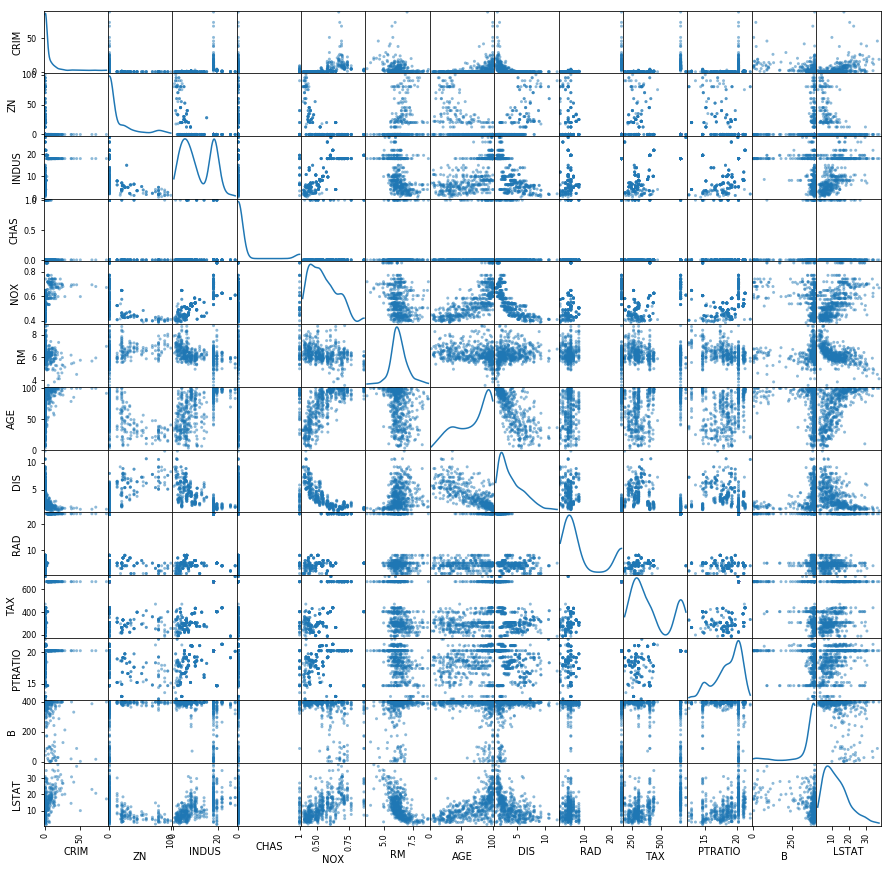

In [9]:
# The data frame can then use pandas scatter matrix plot
matrix_plot = pd.plotting.scatter_matrix(df, figsize=(15, 15), diagonal='kde')

# matplotlib display
plt.show()

## Regression

Let's run a linear regression on this data. I will do things the typical ML way quickly, and then I'll do a slightly longer example with pandas.

According to what we learned above, there is a numpy matrix for "data" and one for "target" (the median value of the homes). This makes things pretty easy to run.

In [10]:
# Create a new linear model object
lm = LinearRegression()

# Fit it
lm_fit = lm.fit(X=house_prices["data"], y=house_prices["target"])

# See coefficients
print(lm.coef_)

[ -1.07170557e-01   4.63952195e-02   2.08602395e-02   2.68856140e+00
  -1.77957587e+01   3.80475246e+00   7.51061703e-04  -1.47575880e+00
   3.05655038e-01  -1.23293463e-02  -9.53463555e-01   9.39251272e-03
  -5.25466633e-01]


You can also slice the input data and feed it to the linear regression function.

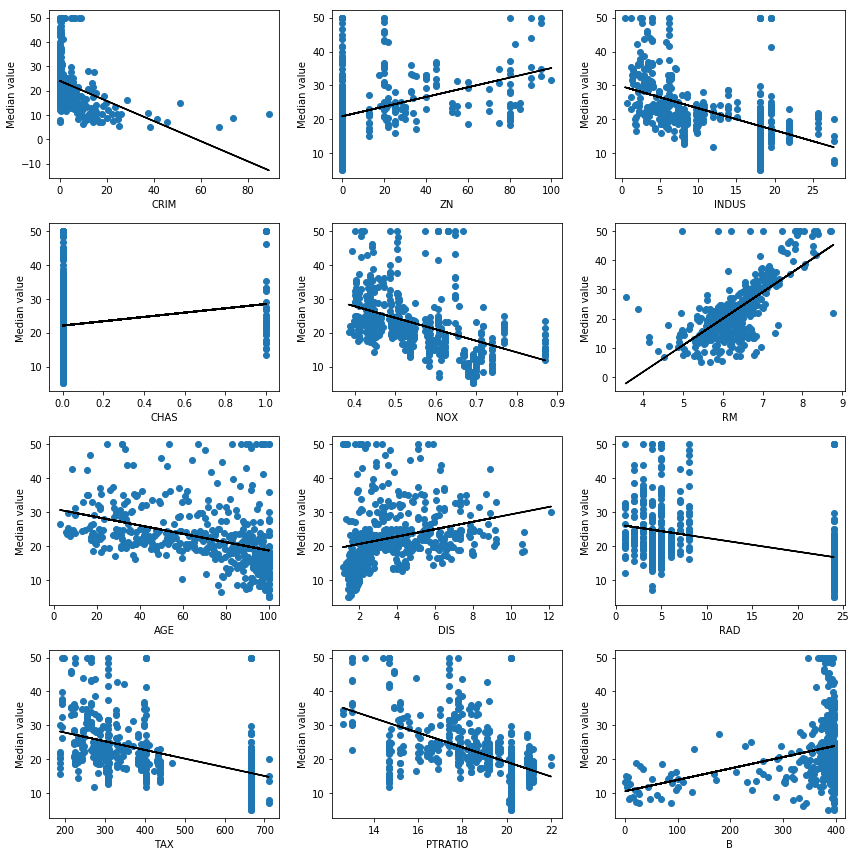

In [11]:
# You can create a linear regression object once and re-use it
# This might be risky with more sophisticated models though
lm = LinearRegression()

# It's necessary to enlarge the figure before the plotting starts
plt.figure(figsize=(12, 12))

# Generate all the subplots
for index_number in range(12):
    # Index to run
    ivar = index_number

    # Get its name
    ivar_name = house_prices["feature_names"][ivar]

    # Select the independant variable's data only
    ivar_data = np.expand_dims(house_prices["data"][:, ivar], axis=1)

    # Fit it
    lm_fit = lm.fit(X=ivar_data, y=house_prices["target"])

    # Get predictions
    lm_predict = lm.predict(X=ivar_data)

    # This assigns a subplot
    # The arguments are nrows, ncol, index (+1)
    plt.subplot(4, 3, index_number+1)
    
    # Scatter plot
    plt.scatter(ivar_data, house_prices["target"])
    
    # Line
    plt.plot(ivar_data, lm_predict,  color="black")
    
    # Set labels
    plt.xlabel(ivar_name)
    plt.ylabel("Median value")

# Render
plt.tight_layout()
plt.show()

## Detour 3: using statsmodels instead of scikit-learn

To me, the above output is fine if I'm working with neural networks: I'm used to nothing making sense. However, with a linear regression, I find it's better to use a more descriptive approach, especially if you're performing economics.

Before I do any of this, I have to merge my X and Y data together. There's a bit of a problem because the target data has no axis 1 dimension.

In [12]:
# X
print(house_prices["data"].shape)

# Y (axis 1 is empty)
print("{0}   <-- lacks a dimension size".format(house_prices["target"].shape))

# Expand axis 1
print("{0} <-- this is better".format(np.expand_dims(house_prices["target"], axis=1).shape))

# Now works
np.concatenate((house_prices["data"], np.expand_dims(house_prices["target"], axis=1)), axis=1).shape

(506, 13)
(506,)   <-- lacks a dimension size
(506, 1) <-- this is better


(506, 14)

In the case of the column names, an `.append()` will work.

In [13]:
# In the case of the column names, I have to do an np.append()
np.append(house_prices["feature_names"], "MEDV")

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='<U7')

In [14]:
# We are going to re-use the dataframe from before, but this time include "target"
df = pd.DataFrame(data=np.concatenate((house_prices["data"], np.expand_dims(house_prices["target"], axis=1)), axis=1), 
                                      columns=np.append(house_prices["feature_names"], "MEDV"))

# Now works
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


With that out of the way, we can now use the `statsmodel` package.

In [15]:
# Note that the backslash lets me continue the string on another line
lm = sm.ols(formula="MEDV ~ CRIM + ZN + INDUS + CHAS + NOX + \
    RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT", data=df).fit()

In [16]:
print(lm.params)

Intercept    36.491103
CRIM         -0.107171
ZN            0.046395
INDUS         0.020860
CHAS          2.688561
NOX         -17.795759
RM            3.804752
AGE           0.000751
DIS          -1.475759
RAD           0.305655
TAX          -0.012329
PTRATIO      -0.953464
B             0.009393
LSTAT        -0.525467
dtype: float64


In [17]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Tue, 28 Nov 2017   Prob (F-statistic):          6.95e-135
Time:                        21:13:07   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4911      5.104      7.149      0.0

## Running multiple regressions alongside one another

Let's switch to another dataset. I am not sure what the data in the diabetes datasets is, but I know it has `.data` and `.target`.

**Note**: it turns out it's important to always `print()` and explore things. It turns out there were notes in there all along!

In [18]:
diabetes = datasets.load_diabetes()

print(diabetes.data.shape)
print(diabetes.target.shape)
print(diabetes.feature_names)
print(diabetes.DESCR)

(442, 10)
(442,)
['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
Diabetes dataset

Notes
-----

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

Data Set Characteristics:

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attributes:
    :Age:
    :Sex:
    :Body mass index:
    :Average blood pressure:
    :S1:
    :S2:
    :S3:
    :S4:
    :S5:
    :S6:

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more in

What I'm going to do this time is randomly sample the data, and then I'm going to fit it using a list of regression methods.

For the sampling I am going to use Python's base `random` package. I am only going to sample row numbers, so might as well keep it simple.

R^2 score for OLS is 0.24727705884734452
R^2 score for AdaBoost + OLS @ 25 is 0.24632505649776426
R^2 score for KNN is 0.2735999608243018
R^2 score for Random Forests is 0.6864882538336716


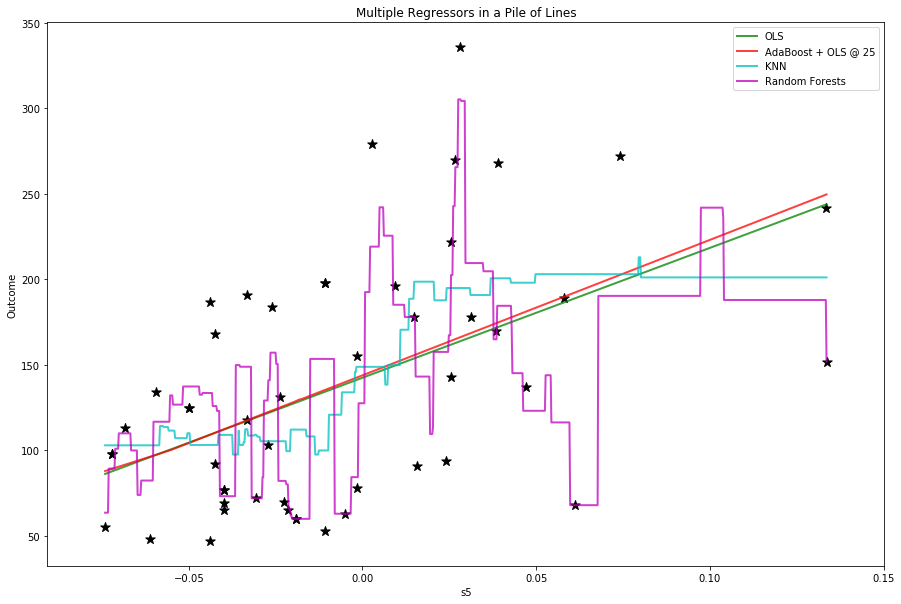

In [19]:
# I want to randomly sample the data
number_of_obs = diabetes.data.shape[0]
sample_size = 50
sample = random.choices(list(range(number_of_obs)), k=sample_size)
#print("Currently sampled rows: {0}".format(str(sample)))

# Chosen X index
x_index = 8
x_name = diabetes.feature_names[x_index]

# Subset X and Y
X = diabetes.data[sample,x_index].reshape(-1, 1)
Y = diabetes.target[sample]

# Generate some uniform fake data for plotting results
fake_data = np.linspace(min(X), max(X), 1000).reshape(-1, 1)

# It's necessary to enlarge the figure before the plotting starts
plt.figure(figsize=(15, 10))

# Create a list of regressors
regressors = [LinearRegression(), 
              AdaBoostRegressor(LinearRegression(), n_estimators=25), 
              KNeighborsRegressor(n_neighbors=10), 
              RandomForestRegressor(n_estimators=5)]

# Give them names for the legend
regressor_names = ["OLS", "AdaBoost + OLS @ 25", "KNN", "Random Forests"]

# Also give them colors
colors = ["g", "r", "c", "m"]

# Create the scatter plot now
plt.scatter(X, Y, color="k", marker="*", s=100)

# You can use the zip() function to iterate over multiple series
for regressor, name, color in zip(regressors, regressor_names, colors):
    # fit instance
    fit = regressor.fit(X=X, y=Y)
    # predict using instance
    fake_predict = regressor.predict(X=fake_data)
    # plot predictions
    plt.plot(fake_data, fake_predict, label=name, color=color, linewidth=2, alpha=0.75)
    # print R^2
    true_predict = regressor.predict(X=X)
    print("R^2 score for {0} is {1}".format(name, r2_score(Y, true_predict)))

# Set labels
plt.xlabel(x_name)
plt.ylabel("Outcome")

# Title
plt.title("Multiple Regressors in a Pile of Lines")

# Legend
plt.legend()

# Render
plt.show()

Hope this was useful. Leave feedback if you have any!